## ASSIGNMENT 8: HR Employee Analytics

### Q8.1: Department Headcount
#### Load HR data and display department-wise employee count

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('assignment8_hr_employee_data(in).csv')
df

,EmployeeID,EmployeeName,Department,Designation,Salary,JoiningYear,PerformanceRating,ProjectsCompleted,Location
0,5001,Employee_1,HR,Junior,116465,2017,2.2,12,Bangalore
1,5002,Employee_2,Marketing,Intern,71605,2017,3.7,10,Hyderabad
2,5003,Employee_3,Sales,Junior,44955,2017,4.2,18,Hyderabad
3,5004,Employee_4,Marketing,Lead,74049,2020,4.4,36,Delhi
4,5005,Employee_5,HR,Manager,43917,2022,3.2,39,Mumbai
...,...,...,...,...,...,...,...,...,...
145,5146,Employee_146,Sales,Lead,36476,2019,3.5,22,Bangalore
146,5147,Employee_147,Engineering,Intern,81756,2021,3.2,44,Hyderabad
147,5148,Employee_148,Engineering,Lead,120101,2023,4.7,37,Mumbai
148,5149,Employee_149,HR,Manager,32382,2023,3.8,16,Mumbai


In [4]:
emp_count = df.groupby('Department')['EmployeeID'].count()
emp_count

Department
Engineering    31
Finance        28
HR             35
Marketing      23
Sales          33
Name: EmployeeID, dtype: int64

### Q8.2: Salary Analysis
#### Calculate average salary by department and designation.

In [6]:
avg_salary = round(df.groupby(['Department','Designation'])['Salary'].mean(),2)
avg_salary

Department   Designation
Engineering  Intern          82160.50
             Junior          74756.00
             Lead            81970.60
             Manager         63623.80
             Senior          78217.17
Finance      Intern          66093.00
             Junior          95564.20
             Lead           100611.25
             Manager         91417.86
             Senior          98621.00
HR           Intern          83373.25
             Junior          88610.12
             Lead           107853.33
             Manager         79185.33
             Senior          83286.00
Marketing    Intern          71368.33
             Junior         116073.00
             Lead            92666.40
             Manager         84926.67
             Senior          70879.25
Sales        Intern          92775.75
             Junior          86278.00
             Lead            85044.25
             Manager         85228.33
             Senior         109143.50
Name: Salary, dtype: floa

### Q8.3: Location Analysis
#### Group employees by location and calculate total and average salary.

In [11]:
emp_location = round(df.groupby('Location')['Salary'].agg(['sum','mean']).reset_index(),2)
emp_location

,Location,sum,mean
0,Bangalore,2904991,88030.03
1,Delhi,1938600,84286.96
2,Hyderabad,2319900,85922.22
3,Mumbai,2772884,84026.79
4,Pune,3081033,90618.62


### Q8.4: Pivot Table
#### Create a pivot table showing department vs designation with salary totals.

In [13]:
pivot_table = pd.pivot_table(df, index='Department', columns='Designation', values='Salary', aggfunc='sum').reset_index()
pivot_table

Designation,Department,Intern,Junior,Lead,Manager,Senior
0,Engineering,492963,299024,819706,318119,469303
1,Finance,330465,477821,402445,639925,690347
2,HR,666986,708881,647120,475112,583002
3,Marketing,214105,580365,463332,509560,283517
4,Sales,371103,690224,680354,767055,436574


### Q8.5: Service Years
#### Add a calculated column for service years (current year - JoiningYear).

In [17]:
df['Service_Years']= 2024-df['JoiningYear']

In [18]:
df

,EmployeeID,EmployeeName,Department,Designation,Salary,JoiningYear,PerformanceRating,ProjectsCompleted,Location,Service_Years
0,5001,Employee_1,HR,Junior,116465,2017,2.2,12,Bangalore,7
1,5002,Employee_2,Marketing,Intern,71605,2017,3.7,10,Hyderabad,7
2,5003,Employee_3,Sales,Junior,44955,2017,4.2,18,Hyderabad,7
3,5004,Employee_4,Marketing,Lead,74049,2020,4.4,36,Delhi,4
4,5005,Employee_5,HR,Manager,43917,2022,3.2,39,Mumbai,2
...,...,...,...,...,...,...,...,...,...,...
145,5146,Employee_146,Sales,Lead,36476,2019,3.5,22,Bangalore,5
146,5147,Employee_147,Engineering,Intern,81756,2021,3.2,44,Hyderabad,3
147,5148,Employee_148,Engineering,Lead,120101,2023,4.7,37,Mumbai,1
148,5149,Employee_149,HR,Manager,32382,2023,3.8,16,Mumbai,1


### Q8.6: Top Earners
#### Find top 10 employees by salary and display their details.

In [20]:
Top_earners = df.nlargest(10,'Salary')[['EmployeeID', 'EmployeeName', 'Department', 'Salary', 'PerformanceRating', 'ProjectsCompleted', 'Location', 'Service_Years']]

In [21]:
Top_earners

,EmployeeID,EmployeeName,Department,Salary,PerformanceRating,ProjectsCompleted,Location,Service_Years
67,5068,Employee_68,Marketing,149639,5.0,35,Bangalore,6
7,5008,Employee_8,HR,149072,3.7,16,Mumbai,6
115,5116,Employee_116,Finance,148696,4.8,25,Mumbai,7
99,5100,Employee_100,HR,148592,3.3,36,Bangalore,5
137,5138,Employee_138,Finance,148094,4.9,45,Mumbai,1
80,5081,Employee_81,HR,146464,4.9,19,Pune,1
68,5069,Employee_69,Finance,143945,2.5,27,Bangalore,9
18,5019,Employee_19,Sales,142622,3.9,8,Pune,3
77,5078,Employee_78,Sales,141718,3.1,20,Pune,2
23,5024,Employee_24,HR,140107,3.9,17,Delhi,7


### Q8.7: Performance Analysis
#### Identify underperformers (PerformanceRating < 3.0) by department

In [38]:
under = df[df['PerformanceRating']<3.0]
under_performers = under.groupby('Department').size()
under_performers

Department
Engineering     8
Finance        10
HR             11
Marketing       7
Sales          11
dtype: int64

### Q8.8: Projects Analysis
#### Create a summary showing projects completed by department.

In [29]:
summary = df.groupby('Department')['ProjectsCompleted'].sum().reset_index()
summary

,Department,ProjectsCompleted
0,Engineering,874
1,Finance,851
2,HR,958
3,Marketing,600
4,Sales,902


### Q8.9: Export Report
#### Export a comprehensive HR summary to hr_summary_report.csv.

In [30]:
df

,EmployeeID,EmployeeName,Department,Designation,Salary,JoiningYear,PerformanceRating,ProjectsCompleted,Location,Service_Years
0,5001,Employee_1,HR,Junior,116465,2017,2.2,12,Bangalore,7
1,5002,Employee_2,Marketing,Intern,71605,2017,3.7,10,Hyderabad,7
2,5003,Employee_3,Sales,Junior,44955,2017,4.2,18,Hyderabad,7
3,5004,Employee_4,Marketing,Lead,74049,2020,4.4,36,Delhi,4
4,5005,Employee_5,HR,Manager,43917,2022,3.2,39,Mumbai,2
...,...,...,...,...,...,...,...,...,...,...
145,5146,Employee_146,Sales,Lead,36476,2019,3.5,22,Bangalore,5
146,5147,Employee_147,Engineering,Intern,81756,2021,3.2,44,Hyderabad,3
147,5148,Employee_148,Engineering,Lead,120101,2023,4.7,37,Mumbai,1
148,5149,Employee_149,HR,Manager,32382,2023,3.8,16,Mumbai,1


In [35]:
hr_summary = round(df.groupby(['Department','Designation']).agg({'Salary':['sum', 'min', 'max', 'mean'], 'PerformanceRating':'mean', 'ProjectsCompleted':'sum', 'EmployeeID':'count', 'Service_Years':'median'}),2).reset_index()

In [36]:
hr_summary

Department Designation  Salary                            \
                                sum    min     max       mean   
0   Engineering      Intern  492963  34234  122365   82160.50   
1   Engineering      Junior  299024  41064  121057   74756.00   
2   Engineering        Lead  819706  42816  130546   81970.60   
3   Engineering     Manager  318119  51113   71153   63623.80   
4   Engineering      Senior  469303  58916  114607   78217.17   
5       Finance      Intern  330465  30717  102617   66093.00   
6       Finance      Junior  477821  34434  143945   95564.20   
7       Finance        Lead  402445  32581  148696  100611.25   
8       Finance     Manager  639925  60075  130598   91417.86   
9       Finance      Senior  690347  60049  148094   98621.00   
10           HR      Intern  666986  41676  129120   83373.25   
11           HR      Junior  708881  30192  132811   88610.12   
12           HR        Lead  647120  39359  149072  107853.33   
13           HR     Manager  475112  32382  137216   79185.33   
14           HR      Senior  583002  34994  146464   83286.00   
15    Marketing      Intern  214105  42207  100293   71368.33   
16    Marketing      Junior  580365  77221  149639  116073.00   
17    Marketing        Lead  463332  66945  132023   92666.40   
18    Marketing     Manager  509560  38640  133361   84926.67   
19    Marketing      Senior  283517  33453  120226   70879.25   
20        Sales      Intern  371103  69082  126371   92775.75   
21        Sales      Junior  690224  32763  133932   86278.00   
22        Sales        Lead  680354  36476  132197   85044.25   
23        Sales     Manager  767055  35618  132120   85228.33   
24        Sales      Senior  436574  45534  142622  109143.50   

   PerformanceRating ProjectsCompleted EmployeeID Service_Years  
                mean               sum      count        median  
0               2.88               157          6           4.5  
1               3.80                95          4           4.0  
2               4.00               297         10           4.5  
3               3.74               151          5           3.0  
4               3.73               174          6           5.0  
5               3.28               144          5           4.0  
6               3.04               142          5           8.0  
7               3.92               131          4           7.0  
8               3.20               244          7           6.0  
9               3.69               190          7           3.0  
10              3.60               283          8           7.0  
11              3.04               175          8           4.5  
12              3.68               130          6           6.0  
13              4.30               178          6           5.0  
14              3.40               192          7           6.0  
15              3.07                71          3           3.0  
16              3.50               147          5           5.0  
17              3.98               110          5           4.0  
18              3.67               194          6           4.5  
19              3.90                78          4           5.5  
20              3.45               132          4           2.0  
21              3.14               232          8           5.5  
22              3.04               179          8           6.0  
23              3.88               288          9           6.0  
24              3.32                71          4           2.0

In [37]:
hr_summary.to_csv('hr_summary_report.csv')

### Q8.10: Visualizations
#### Create visualizations for salary distribution and performance ratings.

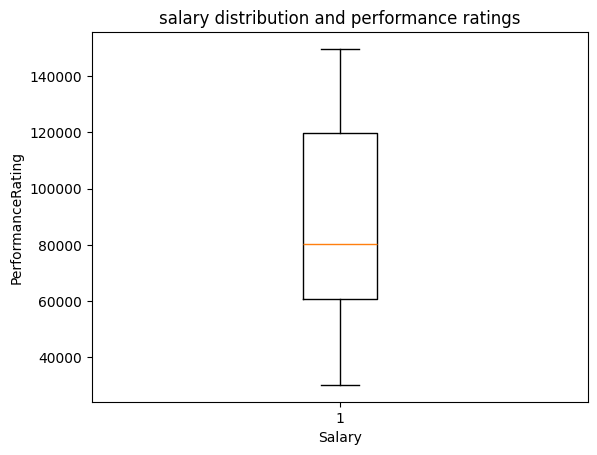

In [51]:

plt.boxplot(data=df, x='Salary')
plt.title("salary distribution and performance ratings")
plt.xlabel('Salary')
plt.ylabel('PerformanceRating')
plt.show()

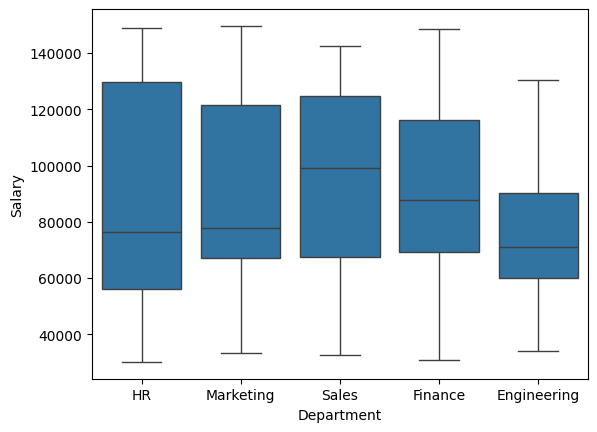

In [49]:
sns.boxplot(x='Department', y='Salary', data=df)
plt.show()

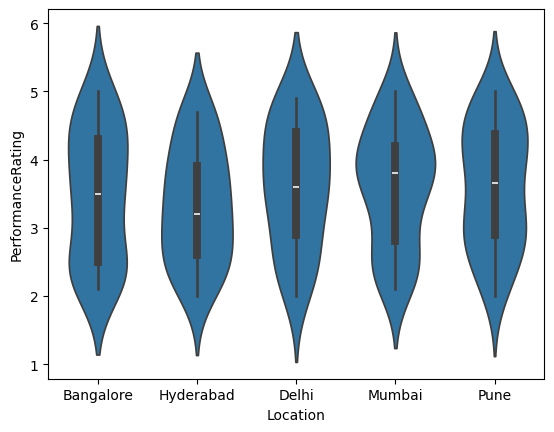

In [52]:
sns.violinplot(data=df, x='Location', y='PerformanceRating')
plt.show()

C:\Users\vishnu prasath\AppData\Local\Temp\ipykernel_711336\3016483368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Salary', data=df, ax=ax1, palette='Set1')
C:\Users\vishnu prasath\AppData\Local\Temp\ipykernel_711336\3016483368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Location', y='PerformanceRating', ax=ax2, palette='Set2')


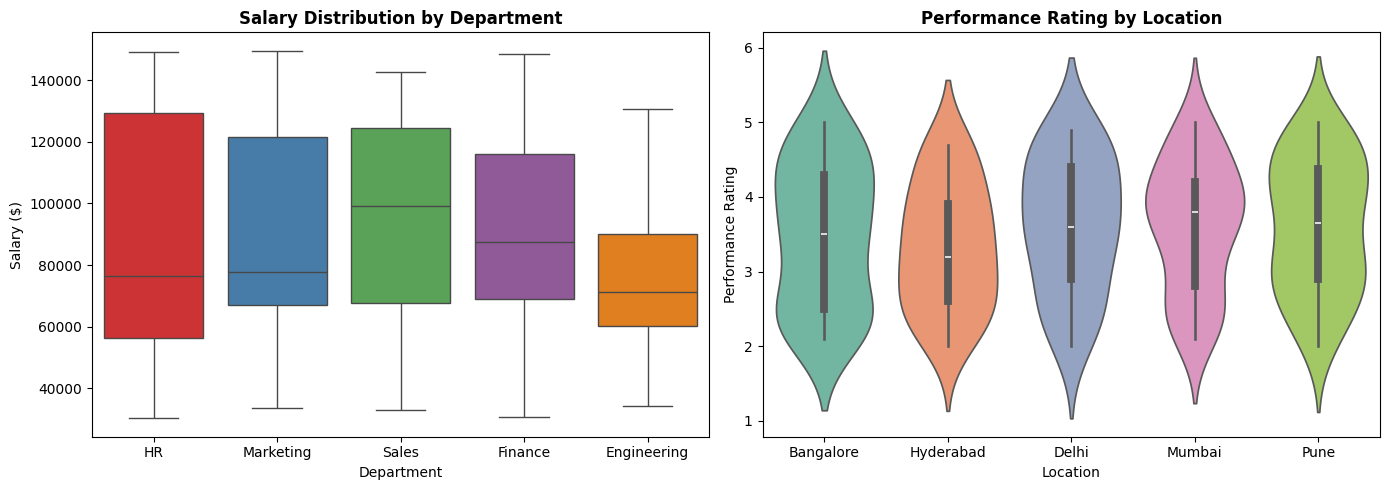

In [58]:
fig, (ax1,ax2)=plt.subplots(1, 2, figsize=(14,5))
sns.boxplot(x='Department', y='Salary', data=df, ax=ax1, palette='Set1')
ax1.set_title('Salary Distribution by Department', fontweight='bold')
ax1.set_ylabel('Salary ($)')

sns.violinplot(data=df, x='Location', y='PerformanceRating', ax=ax2, palette='Set2')
ax2.set_title('Performance Rating by Location', fontweight='bold')
ax2.set_ylabel('Performance Rating')
plt.tight_layout()
plt.show()